In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

wine_dataset = pd.read_csv("./winequality_dataset.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
X = wine_dataset.drop(columns = 'quality', axis=1)
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [4]:
wine_dataset["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
wine_dataset['quality'] = np.where(wine_dataset['quality'] > 7, "good","bad")
Y = wine_dataset['quality']
Y

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [7]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, Y_train)
dt_y_pred = dt_clf.predict(X_test)

dt_accuracy = accuracy_score(Y_test, dt_y_pred)
dt_precision = precision_score(Y_test, dt_y_pred)
dt_recall = recall_score(Y_test, dt_y_pred)
dt_f1 = f1_score(Y_test, dt_y_pred)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy:.2f}, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F1 Score: {dt_f1:.2f}")


ValueError: pos_label=1 is not a valid label. It should be one of ['bad', 'good']

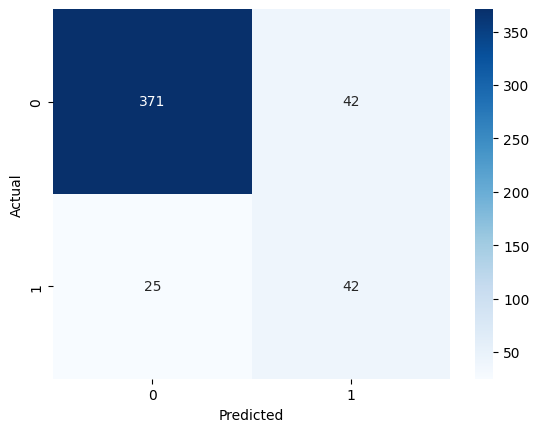

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, dt_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [56]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)
rf_y_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(Y_test, rf_y_pred)
rf_precision = precision_score(Y_test, rf_y_pred)
rf_recall = recall_score(Y_test, rf_y_pred)
rf_f1 = f1_score(Y_test, rf_y_pred)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1 Score: {rf_f1:.2f}")



Random Forest Metrics:
Accuracy: 0.89, Precision: 0.65, Recall: 0.52, F1 Score: 0.58


In [57]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, Y_train)
gb_y_pred = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(Y_test, gb_y_pred)
gb_precision = precision_score(Y_test, gb_y_pred)
gb_recall = recall_score(Y_test, gb_y_pred)
gb_f1 = f1_score(Y_test, gb_y_pred)

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}, Precision: {gb_precision:.2f}, Recall: {gb_recall:.2f}, F1 Score: {gb_f1:.2f}")



Gradient Boosting Metrics:
Accuracy: 0.86, Precision: 0.50, Recall: 0.37, F1 Score: 0.43


In [58]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, Y_train)
ada_y_pred = ada_clf.predict(X_test)

ada_accuracy = accuracy_score(Y_test, ada_y_pred)
ada_precision = precision_score(Y_test, ada_y_pred)
ada_recall = recall_score(Y_test, ada_y_pred)
ada_f1 = f1_score(Y_test, ada_y_pred)

print("\nAdaBoost Metrics:")
print(f"Accuracy: {ada_accuracy:.2f}, Precision: {ada_precision:.2f}, Recall: {ada_recall:.2f}, F1 Score: {ada_f1:.2f}")


c:\Users\Priyanka\anaconda3\envs\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Metrics:
Accuracy: 0.85, Precision: 0.45, Recall: 0.34, F1 Score: 0.39


In [59]:
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, Y_train)
xgb_y_pred = xgb_clf.predict(X_test)

xgb_accuracy = accuracy_score(Y_test, xgb_y_pred)
xgb_precision = precision_score(Y_test, xgb_y_pred)
xgb_recall = recall_score(Y_test, xgb_y_pred)
xgb_f1 = f1_score(Y_test, xgb_y_pred)

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, F1 Score: {xgb_f1:.2f}")



XGBoost Metrics:
Accuracy: 0.89, Precision: 0.61, Recall: 0.54, F1 Score: 0.57


c:\Users\Priyanka\anaconda3\envs\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
